In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Define the cities and their coordinates (x, y)
cities = {
    'A': (0, 0),
    'B': (2, 4),
    'C': (4, 2),
    'D': (6, 5)
}
num_cities = len(cities)

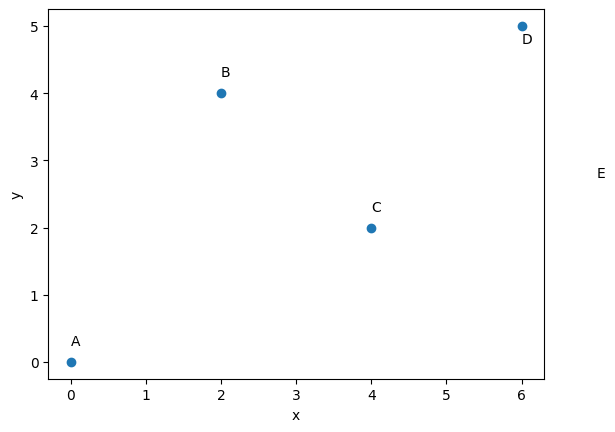

In [3]:
#now plot the city locations
fig,ax = plt.subplots(1,1)
plt.scatter([x for x, y in cities.values()], [y for x, y in cities.values()])
ax.text(0, 0.25, 'A');ax.text(2, 4.25, 'B');ax.text(4, 2.25, 'C');ax.text(6, 4.75, 'D');ax.text(7, 2.75, 'E')
plt.xlabel('x');plt.ylabel('y')
plt.show()

In [4]:
# Function to calculate the Euclidean distance between two cities
def calculate_distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# Objective function for minimization
def objective_function(tour_order):
    tour_order = tour_order.astype(int)
    total_distance = 0
    startcity = list(cities.keys())[tour_order[0]]
    for i in range(num_cities - 1):
        city1 = list(cities.keys())[tour_order[i]]
        city2 = list(cities.keys())[tour_order[i + 1]]
        total_distance += calculate_distance(city1, city2)
    total_distance += calculate_distance(city2, startcity)  # Return to the starting city

In [5]:
def constraint_fun(solution):
    constrain= []
    # Check that each city is visited only once.
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            if solution[i] == solution[j]:
                constrain.append(1)
            else:
                constrain.append(0)

    return (sum(constrain), sum(solution) - 6)

In [6]:
# Define the bounds for the decision variables
bounds = [(0, num_cities - 1) for _ in range(num_cities)]

# Create a constraints dictionary for use in minimize
cons = {'type': 'eq', 'fun': constraint_fun}

# Initial guess (starting tour order)
initial_tour_order = np.array([1,2,0,3])

In [7]:
# Solve the TSP using scipy.optimize.minimize
minimize(objective_function, initial_tour_order, bounds=bounds, method='SLSQP')

TypeError: '<' not supported between instances of 'NoneType' and 'float'

In [ ]:
# Get the optimal tour order
optimal_tour_order = result.x.astype(int)

# Calculate the optimal tour distance
optimal_distance = result.fun

# Reorder the cities based on the optimal tour order
optimal_tour = [list(cities.keys())[i] for i in optimal_tour_order]

# Output the optimal tour and distance
print("Optimal Tour:", " -> ".join(optimal_tour))
print("Optimal Distance:", optimal_distance)